# Homework

Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

## Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv).

You can do it with wget:
```python
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-07 20:23:09--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: 'car_fuel_efficiency.csv'

     0K .......... .......... .......... .......... ..........  5% 1,40M 1s
    50K .......... .......... .......... .......... .......... 11% 23,8M 0s
   100K .......... .......... .......... .......... .......... 17% 16,2M 0s
   150K .......... .......... .......... .......... .......... 23% 3,54M 0s
   200K .......... .......... .......... .......... .......... 29% 9,59M 0s
   250K .......... .......... .......... .......... .......... 35% 14,2M 0s
   300K .......... .......... .......... .......... .......... 40% 5,

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Preparing the dataset

Use only the following columns:
- `'engine_displacement'`,
- `'horsepower'`,
- `'vehicle_weight'`,
- `'model_year'`,
- `'fuel_efficiency_mpg'`

In [11]:
df = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]

In [12]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [19]:
df.shape

(9704, 5)

In [22]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


## EDA
- Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

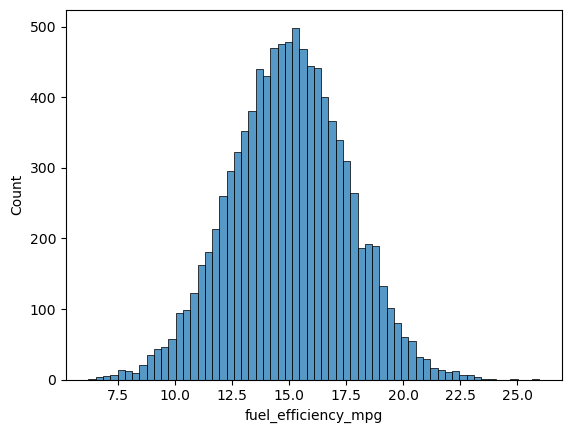

In [21]:
sns.histplot(data=df, x='fuel_efficiency_mpg')

### Question 1

There's one column with missing values. What is it?
- `'engine_displacement'`
- `'horsepower'`
- `'vehicle_weight'`
- `'model_year'`

**Answer : `'horsepower'`**

In [23]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable `'horsepower'`?
- 49
- 99
- 149
- 199

**Answer: 149**

In [27]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


## Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed `42`.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [29]:
np.random.seed(42)

n = len(df)
n

9704

In [31]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

n_val, n_test, n_train

(1940, 1940, 5824)

In [32]:
idx = np.arange(n)
np.random.shuffle(idx)

In [33]:
df_shuffled = df.iloc[idx]

df_shuffled

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,19.961672
5191,160,126.0,3011.588014,2009,14.651056
5390,290,187.0,2440.508039,2019,18.404435
860,260,129.0,1865.404480,2019,20.502460


In [34]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [35]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [71]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [92]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [94]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


In [100]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447])

## Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

**Answer: With 0**

In [101]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [102]:
def prepare_X_zero(df):
    df_num = df
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [111]:
X_train_zero = prepare_X_zero(df_train)
w_0, w = train_linear_regression(X_train_zero, y_train)

In [112]:
y_pred = w_0 + X_train_zero.dot(w)

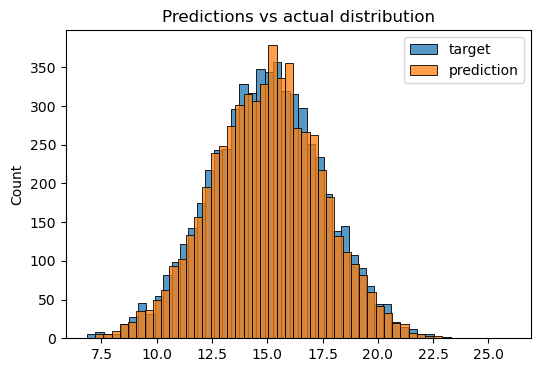

In [113]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target')
sns.histplot(y_pred, label='prediction')
plt.legend()
plt.title('Predictions vs actual distribution')

plt.show()

In [114]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [115]:
rmse(y_train, y_pred)

0.5202614265099076

In [122]:
X_val_zero = prepare_X_zero(df_val)
y_pred = w_0 + X_val_zero.dot(w)

In [123]:
rmse(y_val, y_pred)

0.6116860276769278

In [116]:
def prepare_X_mean(df):
    df_num = df
    df_num = df_num.fillna(df.mean())
    X = df_num.values
    return X

In [117]:
X_train_mean = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train_mean, y_train)

In [118]:
y_pred_mean = w_0 + X_train_mean.dot(w)

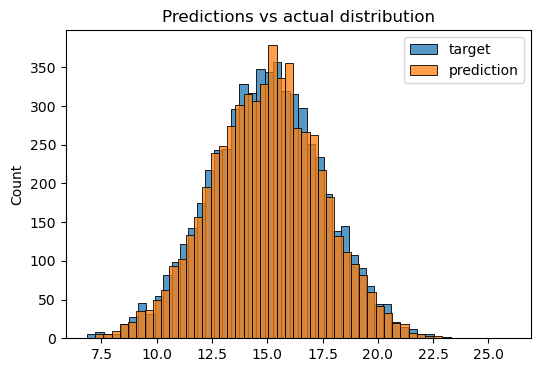

In [119]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target')
sns.histplot(y_pred, label='prediction')
plt.legend()
plt.title('Predictions vs actual distribution')

plt.show()

In [120]:
rmse(y_train, y_pred_mean)

0.4624412137959964

In [124]:
X_val_mean = prepare_X_mean(df_val)
y_pred_mean = w_0 + X_val_mean.dot(w)

In [125]:
rmse(y_val, y_pred_mean)

0.4636236995033421

## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:
- 0
- 0.01
- 1
- 10
- 100

**Answer: 0**

In [147]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [148]:
X_train = prepare_X_zero(df_train)

In [149]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[1], w[2]))

    0, 28.83, 0.00, -0.01
 0.01, 24.93, 0.00, -0.01
  0.1, 11.24, 0.00, -0.01
    1, 1.73, 0.00, -0.01
    5, 0.36, 0.00, -0.01
   10, 0.18, 0.00, -0.01
  100, 0.02, 0.00, -0.01


In [150]:
X_train = prepare_X_zero(df_train)
X_val = prepare_X_zero(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred), 2))

     0 0.52
  0.01 0.52
   0.1 0.52
     1 0.52
     5 0.52
    10 0.52
   100 0.52


## Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
- Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?
- 0.001
- 0.006
- 0.060
- 0.600

**Answer: 0.006**

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [177]:
rmse_list = []

In [188]:
def prep_random(s):
    for i in s:
        np.random.seed(i)
        print(i)

        idx = np.arange(n)
        np.random.shuffle(idx)

        df_shuffled = df.iloc[idx]

        df_train = df_shuffled.iloc[:n_train].copy()
        df_val = df_shuffled.iloc[n_train: n_train+n_val].copy()
        df_test = df_shuffled.iloc[n_train+n_val:].copy()

        y_train = df_train.fuel_efficiency_mpg.values
        y_val = df_val.fuel_efficiency_mpg.values
        y_test = df_test.fuel_efficiency_mpg.values

        del df_train['fuel_efficiency_mpg']
        del df_val['fuel_efficiency_mpg']
        del df_test['fuel_efficiency_mpg']

        print(df_train.head())
        
        X_train = prepare_X_zero(df_train)
        w_0, w = train_linear_regression(X_train, y_train)

        X_val = prepare_X_zero(df_val)
        y_pred = w_0 + X_val.dot(w)

        print(rmse(y_val, y_pred))
        
        rmse_list.append(rmse(y_val, y_pred))
        print(rmse_list)
        
        print()

In [189]:
prep_random([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

0
      engine_displacement  horsepower  vehicle_weight  model_year
6146                  240       139.0     2542.449701        2004
3410                  160       138.0     3115.053444        2012
272                   130       136.0     3333.733863        2013
7044                  230       103.0     2825.409654        2005
6730                  270       204.0     3642.313834        2015
0.5206531296316911
[0.5206531296316911, 0.5213388912859871, 0.5228069974798277, 0.5159516741269471, 0.5109129460114398, 0.5283406460161202, 0.5313910658166271, 0.5090670387373443, 0.514739912942597, 0.5131865908322948, 0.521, 0.521, 0.523, 0.516, 0.511, 0.528, 0.531, 0.509, 0.515, 0.513, 0.5206531296316911]

1
      engine_displacement  horsepower  vehicle_weight  model_year
2754                  170       170.0     2770.744260        2004
3802                  230       135.0     2546.670530        2001
1432                  160       179.0     3845.204498        2021
9088                  230 

In [190]:
np.std(rmse_list)

0.006953793471791619

In [191]:
round(np.std(rmse_list), 3)

0.007

## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with `r=0.001`.
- What's the RMSE on the test dataset?

Options:
- 0.15
- 0.515
- 5.15
- 51.5

**Answer: 0.515*

In [193]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
9066,240,136.0,4050.512290,2006
3073,190,141.0,3195.866942,2017
2476,200,184.0,3006.164370,2017
658,200,NaN,2947.143980,2022
954,250,132.0,3114.371978,2001


In [195]:
df_combined = pd.concat([df_train, df_val])

In [196]:
df_combined = df_combined.fillna(0)

In [201]:
pd.Series(y_train)

0       10.304700
1       13.479434
2       16.190653
3       15.446503
4       14.472172
          ...    
5819    14.769735
5820    10.363254
5821    10.592435
5822    17.119261
5823    18.114504
Length: 5824, dtype: float64

In [202]:
y_combined = pd.concat([pd.Series(y_train), pd.Series(y_val)])

In [205]:
X_train = prepare_X_zero(df_combined)
X_test = prepare_X_zero(df_test)

w_0, w = train_linear_regression_reg(X_train, y_combined, r=0.001)
y_pred = w_0 + X_test.dot(w)
print(rmse(y_test, y_pred))

0.5156261299202296
